In [1]:
#import librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Placement_Data.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
#renaming columns
df = df.rename(columns={'ssc_p':'ssc%', 'ssc_b':'ssc_board', 'hsc_p':'hsc%', 'hsc_s':'hsc_stream', 'hsc_b':'hsc_board',
                  'degree_p':'degree%', 'degree_t':'degreetype', 'etest_p':'etest%', 'mba_p':'mba%'})
df.head()

,sl_no,gender,ssc%,ssc_board,hsc%,hsc_board,hsc_stream,degree%,degreetype,workex,etest%,specialisation,mba%,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.drop(['sl_no', 'salary'], axis=1, inplace=True)
df.describe()

,ssc%,hsc%,degree%,etest%,mba%
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [6]:
df.describe(include='object')

,gender,ssc_board,hsc_board,hsc_stream,degreetype,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148



# Basic EDA

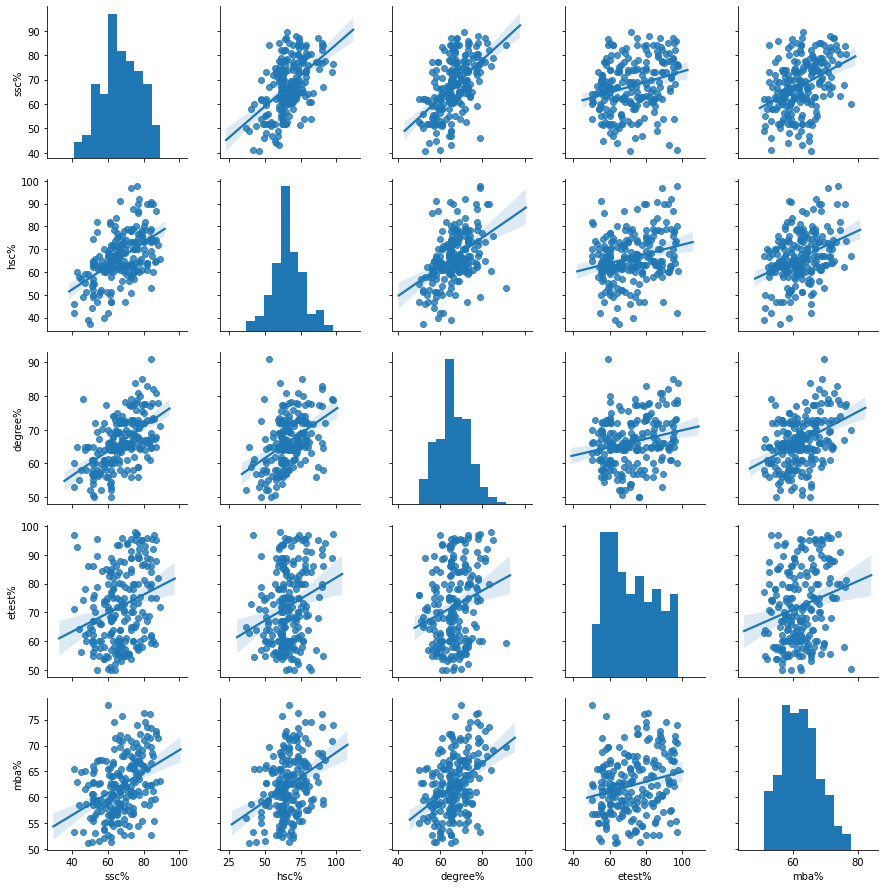

In [7]:
sns.pairplot(df, kind='reg')

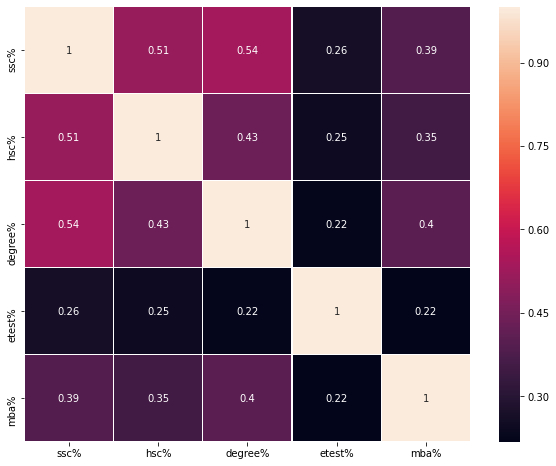

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, linewidth=0.1)

It is observed that salary has high correlation with mba %, for other variables ssc and degree has highest correlation

Text(0, 0.5, 'Students count')

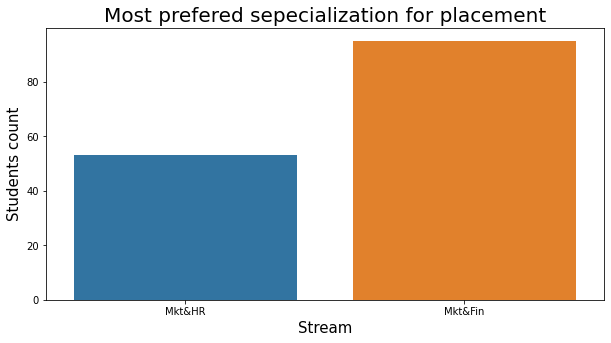

In [9]:
#prefered stream during placement
df1 = df[df['status']=='Placed']
plt.figure(figsize=(10,5))

ax = sns.countplot(x='specialisation', data=df1)
ax.set_title("Most prefered sepecialization for placement", fontsize=20)
ax.set_xlabel("Stream", fontsize=15)
ax.set_ylabel('Students count', fontsize=15 )

Text(0.5, 1.0, 'Distribution plots of marks secured in various stages')

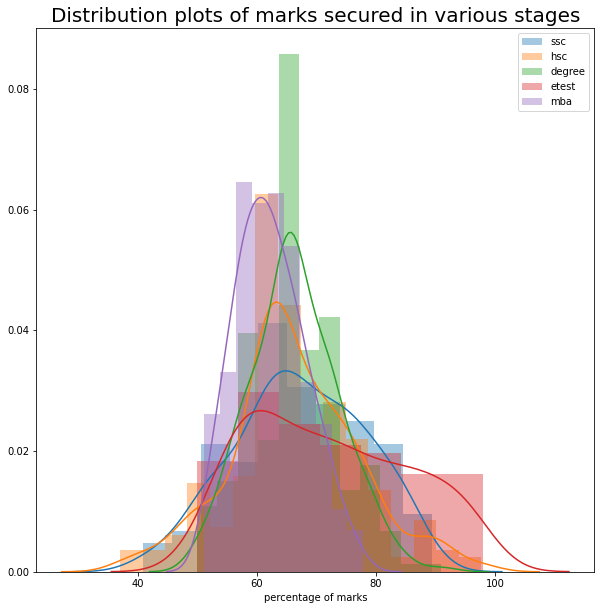

In [10]:
plt.figure(figsize=(10,10))
ax=sns.distplot(df['ssc%'])
ax=sns.distplot(df['hsc%'])
ax=sns.distplot(df['degree%'])
ax=sns.distplot(df['etest%'])
ax=sns.distplot(df['mba%'])
ax.legend(['ssc', 'hsc', 'degree', 'etest', 'mba'])
ax.set_xlabel("percentage of marks")
ax.set_title("Distribution plots of marks secured in various stages", fontsize=20)

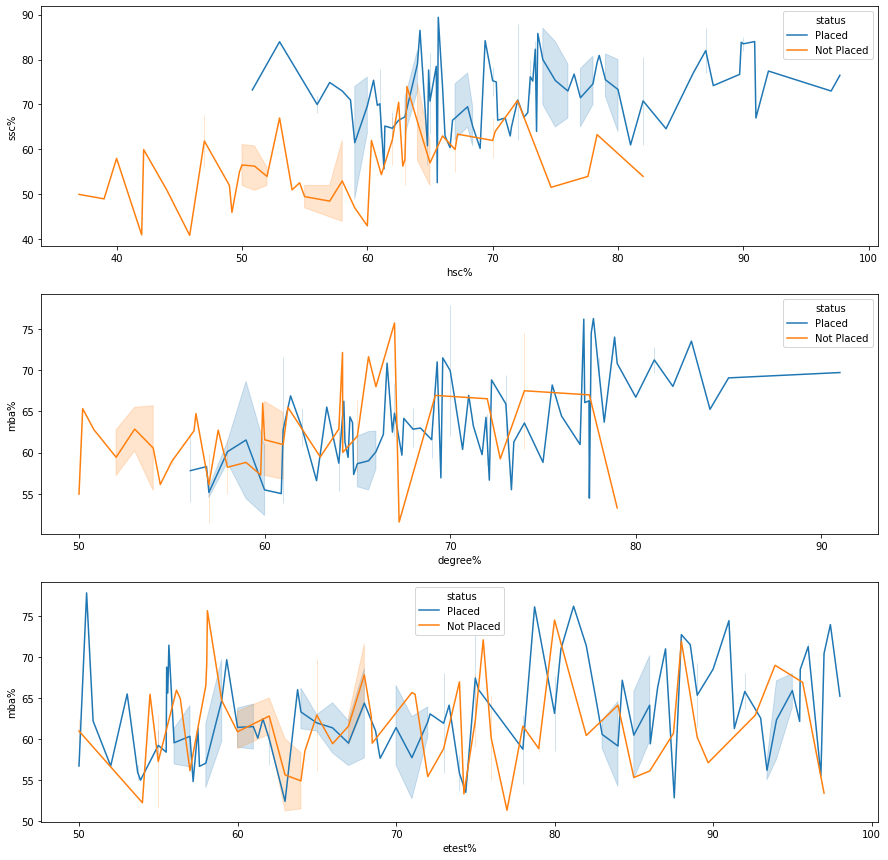

In [11]:
#basic relationship between ssc-hsc, degree-mba, etest-mba
fig, axes=plt.subplots(3,1 ,figsize=(15,15))
sns.lineplot(x='hsc%', y='ssc%', hue='status', data=df, ax=axes[0])
sns.lineplot(x='degree%', y='mba%', hue='status', data=df, ax=axes[1])
sns.lineplot(x='etest%', y='mba%', hue='status', data=df, ax=axes[2])

# Model Estimation

In [12]:
#changing target variables to values
df["status"]=df.apply(lambda x: 1 if x.status=="Placed" else 0,axis=1)

In [13]:
#creating dummies as we have some categorical variables
data = pd.get_dummies( df,drop_first=True)

In [14]:
#Shaping out status as output(y) and others as input(x) variables
x = data.drop('status', axis=1)
y=data['status']

In [15]:
#splitting of data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [16]:
#libraries for measuring models
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
predictions = dtree.predict(x_test)
print('Accuracy score of Decision Tree Classifier is: {:.3}'.format(accuracy_score(y_test, predictions)))
print("Confusion matrix for Decsion Tree Classifier:\n{}".format(confusion_matrix(y_test, predictions)))

Accuracy score of Decision Tree Classifier is: 0.769
Confusion matrix for Decsion Tree Classifier:
[[11  8]
 [ 7 39]]


XG Boost Classifer

In [19]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train, y_train)
predictions = xg.predict(x_test)
print('Accuracy score of XG Boost Classifier is: {:.3}'.format(accuracy_score(y_test, predictions)))
print("Confusion matrix for XG Boost Classifier:\n{}".format(confusion_matrix(y_test, predictions)))

Accuracy score of XG Boost Classifier is: 0.785
Confusion matrix for XG Boost Classifier:
[[11  8]
 [ 6 40]]


Random Forest CLassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train, y_train)
rfc_predict = rf.predict(x_test)
print('Accuracy score of Random Forest Classifier is: {:.3}'.format(accuracy_score(y_test, rfc_predict)))
print("Confusion matrix for Random Forest Classifier:\n{}".format(confusion_matrix(y_test, rfc_predict)))

Accuracy score of Random Forest Classifier is: 0.862
Confusion matrix for Random Forest Classifier:
[[15  4]
 [ 5 41]]


from above it is evident that the Random Forest Classifier best explains the data with an accuracy acore of *86.2%*

In [32]:
from sklearn.metrics import roc_auc_score
print("Are under curve for Random Forest Classifier:{:.3}".format(roc_auc_score(y_test, rfc_predict)))

Are under curve for Random Forest Classifier:0.84
